# EDA on Loan Data Analysis

This dataset is about loan data from LendingClub.com that publish for commercial in Kaggle. LendingClub.com is platform that connects people who need money (borrower) and who have money (investor). As an investor, we need to manage our risk. That's why the priority is to determine good criteria that have high probability of paying back the loan.

## Problem Statement

Analyse the LendingClub.com data from 2007-2010 and try to find out some good criteria of the borrower that have high probability of paying back the loan   

## Data Column

Data set contain

    credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
    
    purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
    
    int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
    
    installment: The monthly instalments owed by the borrower if the loan is funded.

    log.annual.inc: The natural log of the self-reported annual income of the borrower.

    dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

    fico: The FICO credit score of the borrower.

    days.with.cr.line: The number of days the borrower has had a credit line.

    revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

    revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

    inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

    delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

    pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

    not.fully.paid : The borrower can't paid their loan.



In [ ]:
#Import all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode
cf.go_offline()

In [ ]:
# Load the dataset
loan_data=pd.read_csv('loan_data.csv',sep=',')
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
#import pandas_profiling
#report=pandas_profiling.ProfileReport(loan_data)#progress_bar=False
#report

In [ ]:
#report.to_file("myreport.html")

In [ ]:
loan_data.shape

(9578, 14)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loan_data.columns


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

The dataset contains;
    
    1. Total 9578 records
    2. Total 14 columns (features)
    3. Out of 14 columns;
        7- having Integer datatype
        6- having Float datatype
        1- having String datatype   
    4. Out of 14 columns;
        3 columns are having categorical data-- credit_policy, purpose and not_fully_paid
        11 columns are having numerical data

In [ ]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
loan_data.duplicated().sum()

0

## Dataset does not have any null & duplicate values

# Data Cleaning

In [ ]:
loan_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
for x in loan_data.columns:
    if "." in (x):
        loan_data.rename(columns={x:x.replace(".","_")} , inplace = True)
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In dataset, all the columns are having (.), it is replaced with the (_)

# Numerical data description

In [ ]:
loan_data.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Data Visualization

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\d

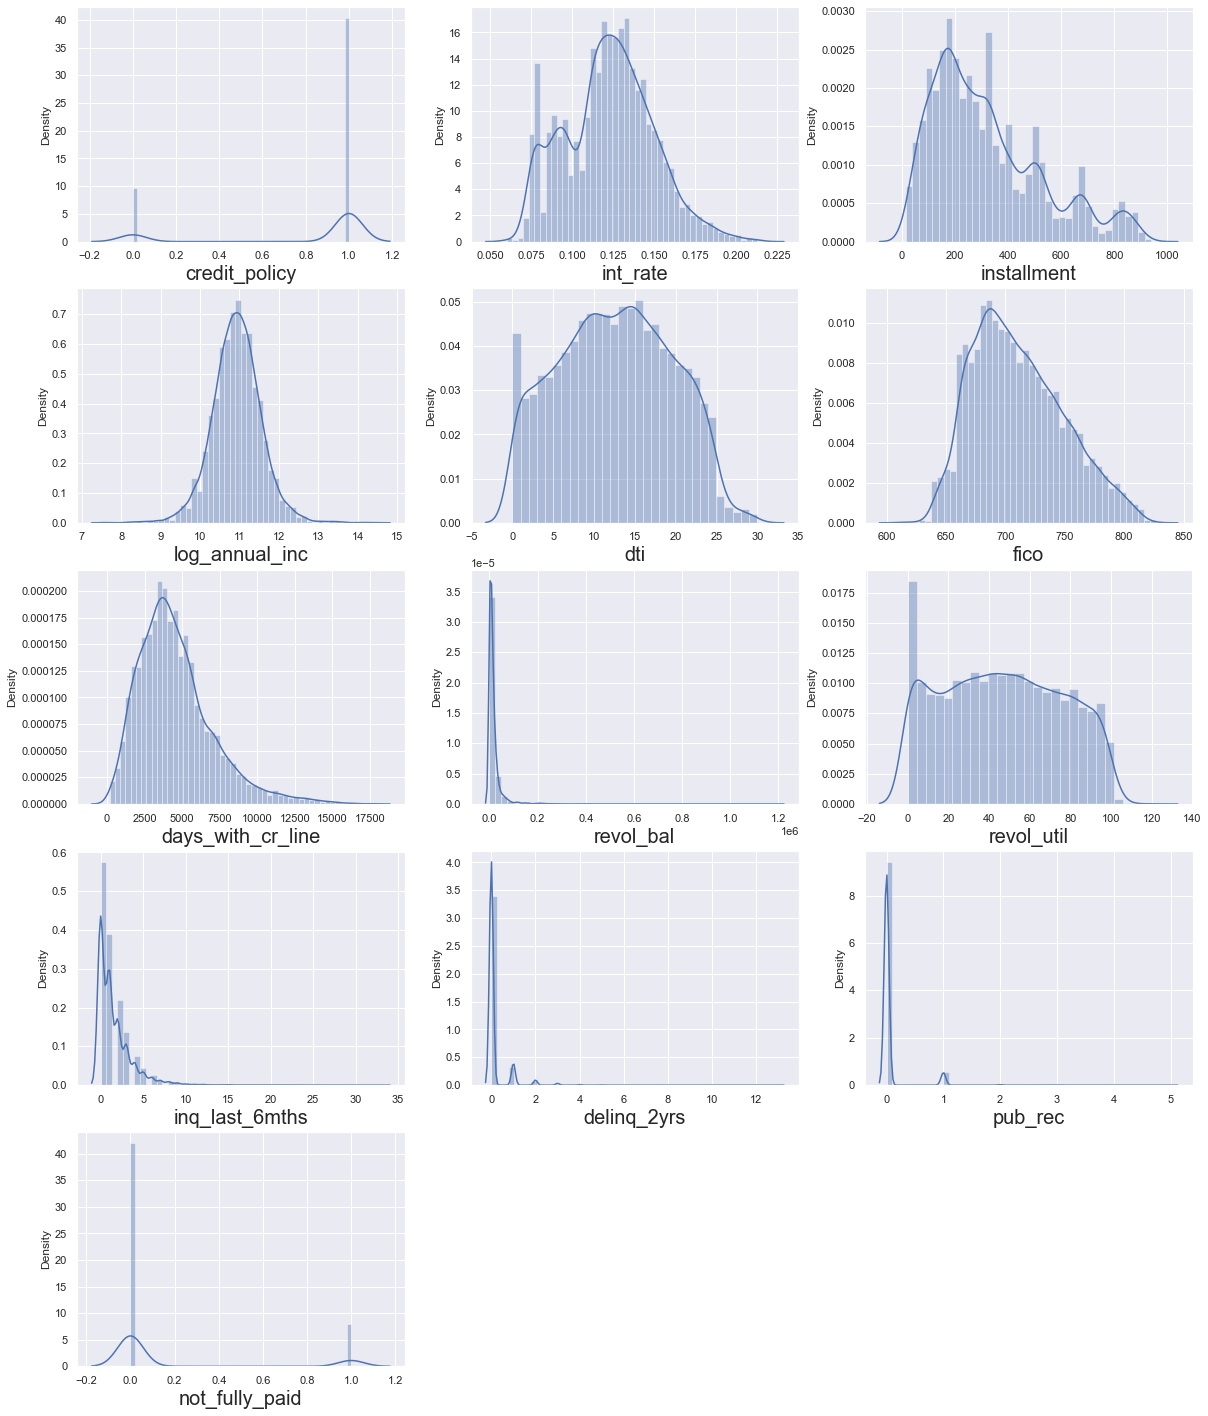

In [ ]:
# let's see how data is distributed for every column
sns.set(style='darkgrid')
x=loan_data.drop(columns=['purpose'])
plt.figure(figsize=(20,25))#, facecolor='white'
plotnumber = 1

for column in x:
    if plotnumber<=13 :     # as there are 14 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

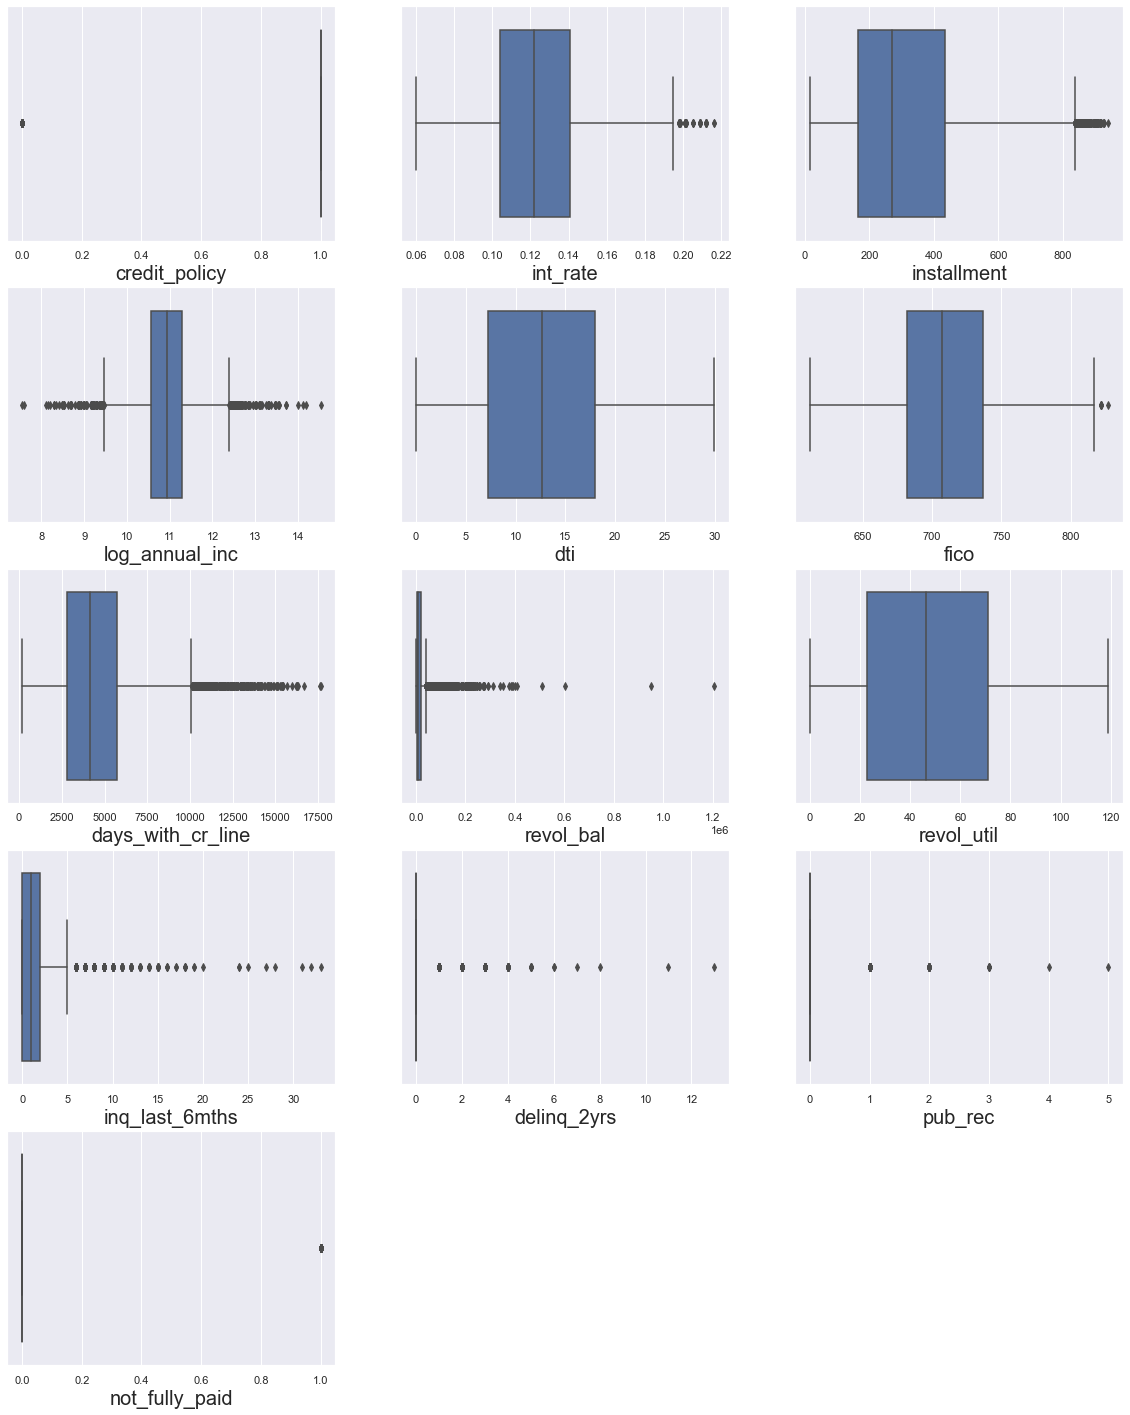

In [ ]:
sns.set(style="darkgrid")
x=loan_data.drop(columns=['purpose'])
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=13 :     # as there are 14 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(x=x[column],data=x)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
loan_data.corr()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
credit_policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int_rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log_annual_inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days_with_cr_line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol_bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol_util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq_last_6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


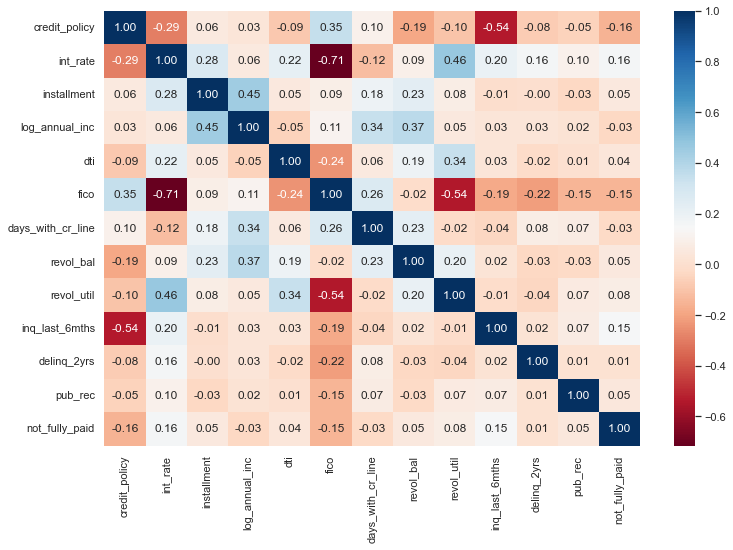

In [ ]:
fig = plt.figure(figsize=[12,8])
sns.heatmap(loan_data.corr(),annot=True,cmap='RdBu',annot_kws={"size": 12},fmt='.2f')
plt.show()

## Observations

    1. The parameters are having skewness, mostly right skewed
    2. Most of the outliers are at the right side
    3.The interest rate is between 0.06 (the lower risk) and 0.2164 (the highest risk)
    4.Lowest instalment is 15.67 and the highest instalment is 940.14
    5.Debt devide by annual income mean is 12.607 point
    6.Fico score mean is 710.8
    7.The borrower days line's to pay their loan is usually between 2820 - 5730 days
    8.The borrower's remaining payment usually between 3187-18250
    9.Some of borrower use more than available total credit amount more than 100 % i.e. 119%
    10.High positive correlation is found between FICO & Credit policy
    11.Interest rate shows high positive correlation with the borrower's revolving line utilization rate (revol_util)
    12.Installement and annual borrowers income is highly correlated (positive)
    13.Derogatory public records of borrowers (pub_rec) shows negative correlation with credit policy & FICO

In [ ]:
loan_data['credit_policy'].value_counts()

1    7710
0    1868
Name: credit_policy, dtype: int64

In [ ]:
loan_data['credit_policy'].value_counts().iplot(kind='bar')

In [ ]:
Loan_accepted=loan_data['credit_policy'].value_counts()[1]
Loan_rejected=loan_data['credit_policy'].value_counts()[0]

print(f'From 9578 borrower, {Loan_accepted} borrower ({Loan_accepted/loan_data.shape[0]*100:.0f}%) had approval for criteria policy from Lending Club')

print(f'From 9578 borrower, {Loan_rejected} borrower ({Loan_rejected/loan_data.shape[0]*100:.0f}%) had not approved for criteria policy from Lending Club')

From 9578 borrower, 7710 borrower (80%) had approval for criteria policy from Lending Club
From 9578 borrower, 1868 borrower (20%) had not approved for criteria policy from Lending Club


In [ ]:
loan_data['not_fully_paid'].value_counts().iplot(kind='bar')

In [ ]:
Loan_not_paid=loan_data['not_fully_paid'].value_counts()[1]
Loan_paid=loan_data['not_fully_paid'].value_counts()[0]

print(f'{Loan_not_paid} customer i.e. around {Loan_not_paid/loan_data.shape[0]*100:.0f}% have not paid their loan')
print(f'{Loan_paid} customer i.e. around {Loan_paid/loan_data.shape[0]*100:.0f}% have paid their loan')

1533 customer i.e. around 16% have not paid their loan
8045 customer i.e. around 84% have paid their loan


In [ ]:
loan_data['purpose'].value_counts().iplot(kind='bar')

In [ ]:
Debt_consolidation=(loan_data['purpose'].value_counts()[0]/len(loan_data['purpose']))*100  #loan_data.shape[0]
Debt_consolidation

41.31342660263103

### Maximum loans (around 41%) are taken for pay off other liabilities and consumer debts i.e. debt consolidation

In [ ]:
loan_data['int_rate'].quantile(0.99)

0.1886

### List of top 1% of borrowers judged by Lending Club to be more risky are assigned higher interest rates
(around 97 Borrowers)

In [ ]:
loan_data[loan_data['int_rate']>=loan_data['int_rate'].quantile(0.99)].sort_values(by='int_rate',ascending=False)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
9549,0,home_improvement,0.2164,729.70,11.877569,8.63,667,8280.041667,55442,66.9,9,0,1,1
9566,0,all_other,0.2164,551.08,11.002100,24.06,662,1800.000000,16441,49.8,9,0,0,1
9346,0,debt_consolidation,0.2121,340.06,11.407565,10.24,682,1452.000000,6089,45.1,10,0,0,0
6517,1,debt_consolidation,0.2121,816.14,11.034890,15.45,667,3120.041667,10190,98.9,1,0,0,0
6202,1,small_business,0.2121,755.69,11.248960,5.72,672,1440.000000,500,83.3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7687,1,all_other,0.1904,916.95,12.345835,14.43,667,5970.041667,39476,78.3,0,0,0,0
7163,1,debt_consolidation,0.1904,916.95,11.461632,16.03,712,5640.041667,33894,99.4,0,0,0,0
8771,0,credit_card,0.1886,155.49,10.945544,27.60,667,4259.958333,41478,99.2,3,0,0,0
8760,0,debt_consolidation,0.1886,274.39,11.314475,27.26,652,3543.958333,22515,95.8,3,0,0,0


In [ ]:
loan_data[loan_data['int_rate']>=loan_data['int_rate'].quantile(0.99)].not_fully_paid.value_counts().iplot(kind='bar')

### Out of 97 borrowers 65 have paid their loan i.e. around 67% and 32 have not paid

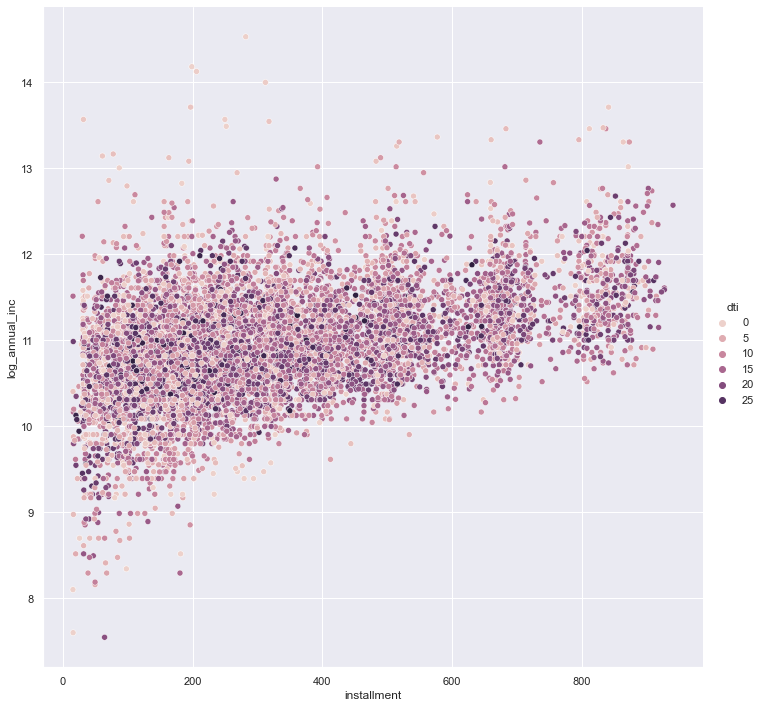

In [ ]:
sns.relplot(x='installment',y='log_annual_inc',hue='dti',height=10,data=loan_data)

### Somewhat positive correlation is seen between installment and the annual income of the borrower

## Credit Analysis

In [ ]:
tdf=loan_data[['fico', 'days_with_cr_line', 'revol_bal', 'revol_util']]
tdf.head()

,fico,days_with_cr_line,revol_bal,revol_util
0,737,5639.958333,28854,52.1
1,707,2760.000000,33623,76.7
2,682,4710.000000,3511,25.6
3,712,2699.958333,33667,73.2
4,667,4066.000000,4740,39.5


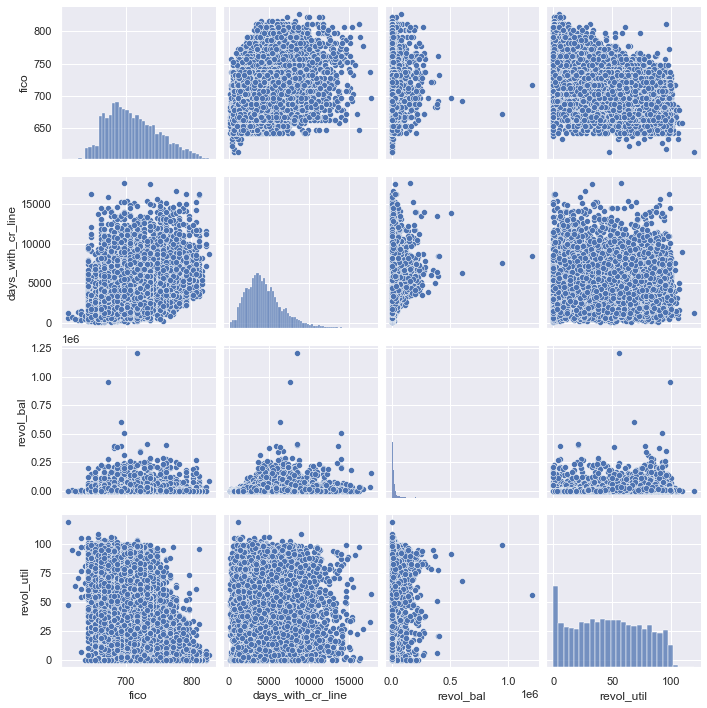

In [ ]:
sns.pairplot(tdf)

In [ ]:
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
tdf=loan_data.groupby('not_fully_paid')

In [ ]:
tdf['pub_rec'].value_counts().iplot(kind='bar')

## Many borrower who have paid the loan have a good record (don't have public derogatory records)

In [ ]:
tdf['delinq_2yrs'].value_counts().iplot(kind='bar')

## 7121 borrower never had been 30+ days past due on a payment in the past 2 years

#### From the above analysis, we can say, good criteria that have high probability of paying back the loan is;

    1. The borrower that have approved credit policy from LendingClub.com.
    2. Borrower had fully paidd their last loan
    3. The borrower who has never late paying their installment (before 30 days)
    4. The borrower who never have a derogatory public records (bankruptcy filings, tax liens, or judgments)

In [ ]:
borrower_loan_good= loan_data[(loan_data['credit_policy'] == 1) & (loan_data['not_fully_paid'] == 0) & (loan_data['delinq_2yrs']== 0) & (loan_data['pub_rec']== 0)]

In [ ]:
borrower_loan_good.shape

(5695, 14)

In [ ]:
borrower_loan_good.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0


## Out of 9578 borrower, 5695 showed a profile of having a high probability of paying you back the loan amount, so the invester can invest their money on the list of above borrower's

In [ ]:
borrower_loan_good.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,5695.0,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000,5695.000000,5695.0,5695.0,5695.0
mean,1.0,0.115291,322.179807,10.946384,12.280996,723.254609,4600.192259,14006.521861,44.227198,0.967867,0.0,0.0,0.0
std,0.0,0.025477,201.820938,0.580409,6.647211,37.179755,2435.078283,17015.906960,28.776677,1.146237,0.0,0.0,0.0
min,1.0,0.060000,15.690000,8.294050,0.000000,627.000000,1110.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,1.0,0.093200,166.095000,10.596585,7.095000,692.000000,2880.000000,3403.000000,19.500000,0.000000,0.0,0.0,0.0
50%,1.0,0.116600,278.070000,10.933107,12.420000,722.000000,4139.958333,8793.000000,42.800000,1.000000,0.0,0.0,0.0
75%,1.0,0.132200,438.975000,11.289782,17.480000,752.000000,5700.500000,17937.000000,67.600000,2.000000,0.0,0.0,0.0
max,1.0,0.212100,916.950000,14.528354,29.420000,827.000000,17616.000000,149527.000000,99.800000,8.000000,0.0,0.0,0.0


#### From the above analysis, we can say, good criteria of the borrower that have high probability of paying back the loan is that minimal fico score must be 627 and better if it is around 722 (median)